In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [135]:
df = pd.read_csv('books_1.csv')

In [136]:
percent_missing = (df.isnull().sum() / len(df)) * 100
print(percent_missing)

bookId               0.000000
title                0.000000
series              55.276497
author               0.000000
rating               0.000000
description          2.549640
language             7.252563
isbn                 0.000000
genres               0.000000
characters           0.000000
bookFormat           2.806891
edition             90.557948
pages                4.472350
publisher            7.042951
publishDate          1.676893
firstPublishDate    40.637982
awards               0.000000
numRatings           0.000000
ratingsByStars       0.000000
likedPercent         1.185259
setting              0.000000
coverImg             1.152864
bbeScore             0.000000
bbeVotes             0.000000
price               27.373376
dtype: float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [137]:
# Check for duplicates
duplicates = df.duplicated()
# Get the rows that are duplicates
duplicate_rows = df[duplicates]
#print(duplicate_rows) before dropping duplicates
df.drop_duplicates(inplace=True)
#print(duplicate_rows) After dropping duplicates

In [138]:
def clean_ratings_column(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: (x.strip('[]')))
    df[col_name] = df[col_name].str.replace(',','')
    df[col_name] = df[col_name].str.replace("'",'')
    df[col_name] = df[col_name].replace("",0)

In [139]:
def fillna_and_convert_to_int(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].fillna(0)
        df[col_name] = df[col_name].astype(int)

In [144]:
df['edition'] = df.apply(lambda row: row['title'] + '_' + 'v1' if pd.isnull(row['edition']) else row['edition'], axis=1)
df['series'] = df.apply(lambda row: row['title'] + '_' + 'v1' if pd.isnull(row['series']) else row['series'], axis=1)


In [145]:
import pandas as pd


# Convert the 'publishDate' column to datetime
df['publishDate'] = pd.to_datetime(df['publishDate'], format='%Y-%m-%d', errors='coerce')

# Extract the year from the 'publishDate' and handle non-finite values
df['publishedYear'] = df['publishDate'].dt.year.fillna(-1).astype(int)

# Replace -1 with NaN if needed
df['publishedYear'].replace(-1, pd.NA, inplace=True)

# Now 'publishedYear' is of integer type with NaN values for non-finite years


In [146]:
df['pages'] = df['pages'].str.replace(r'\D', '')

In [147]:
# Remove non-numeric characters and convert to numeric
df['pages'] = df['pages'].str.replace('[^\d]', '', regex=True)
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')

# Fill missing values with the median and convert to integer
df['pages'] = df['pages'].fillna(df['pages'].median()).astype(int)


In [148]:
df['price'] = pd.to_numeric(df['price'], errors='coerce', downcast='float')


In [149]:
df['price'] = df['price'].fillna(df['price'].median())


In [150]:
df['price'].describe()

count    52428.000000
mean         8.437261
std         20.805012
min          0.840000
25%          3.720000
50%          5.200000
75%          6.572500
max        898.640015
Name: price, dtype: float64

In [151]:
df['bookFormat'].describe()

count         50955
unique          136
top       Paperback
freq          26748
Name: bookFormat, dtype: object

In [152]:
def fillna(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].fillna('Not Available')


In [153]:
colnames = ['description','language','publisher']


In [154]:
fillna(df,colnames)

In [155]:
df['bookFormat'] = df['bookFormat'].fillna(df['bookFormat'].mode()[0])

In [156]:
delete_columns = ['publishDate','firstPublishDate','isbn','likedPercent','coverImg']


In [157]:
df = df.drop(delete_columns, axis = 1)

In [158]:
df.isna().sum()

bookId                0
title                 0
series                0
author                0
rating                0
description           0
language              0
genres                0
characters            0
bookFormat            0
edition               0
pages                 0
publisher             0
awards                0
numRatings            0
ratingsByStars        0
setting               0
bbeScore              0
bbeVotes              0
price                 0
publishedYear     52428
dtype: int64

In [159]:
df.dtypes == 'object'

bookId             True
title              True
series             True
author             True
rating            False
description        True
language           True
genres             True
characters         True
bookFormat         True
edition            True
pages             False
publisher          True
awards             True
numRatings        False
ratingsByStars     True
setting            True
bbeScore          False
bbeVotes          False
price             False
publishedYear      True
dtype: bool

In [160]:
#Top 5 languages
lang_list = list(df["language"].value_counts().index[:5])
lang_values = [df["language"].value_counts().iloc[i] for i in range(len(lang_list))]
fig = px.pie(df,
             values=lang_values,
             names=lang_list)
fig.update_layout(title='Top 5 Languages')
fig.show()

In [161]:
import plotly.express as px

# Clean the "language" column by stripping spaces and converting to lowercase
df['language'] = df['language'].str.strip().str.lower()

# Filter out "not available" language
filtered_df = df[df['language'] != 'not available']

# Get the top 5 languages (excluding "not available")
lang_list = list(filtered_df["language"].value_counts().index[:5])
lang_values = [filtered_df["language"].value_counts().iloc[i] for i in range(len(lang_list))]

# Create the pie chart
fig = px.pie(filtered_df,
             values=lang_values,
             names=lang_list)
fig.update_layout(title='Top 5 Languages (Excluding "Not available")')
fig.show()



In [162]:
import plotly.express as px

# Calculate format counts
format_counts = df['bookFormat'].value_counts()

# Select the top 5 formats
top_formats = format_counts.head(5)

fig = px.pie(top_formats, 
             names=top_formats.index, 
             values=top_formats.values, 
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             labels={'label': 'Format', 'value': 'Count'})

fig.update_traces(textposition='inside', 
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#FFFFFF', width=1)))

fig.update_layout(title='Top 5 Book Formats',
                  font=dict(family='Arial', size=18, color='#333333'))

fig.show()


In [163]:
#Top 10 genres
top_genres = df['genres'].str.split(',', expand=True).stack().value_counts()[:10]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black']
fig = px.bar(top_genres, x=top_genres.index, y=top_genres.values, color=colors)
fig.update_layout(title='Top 10 Most Frequent Genres')
fig.update_xaxes(title='Genre')
fig.update_yaxes(title='No. of Books (count)')
fig.show()


Correlation between Number of Ratings and Price: -0.02


Correlation between Average Rating and Number of Pages: 0.10


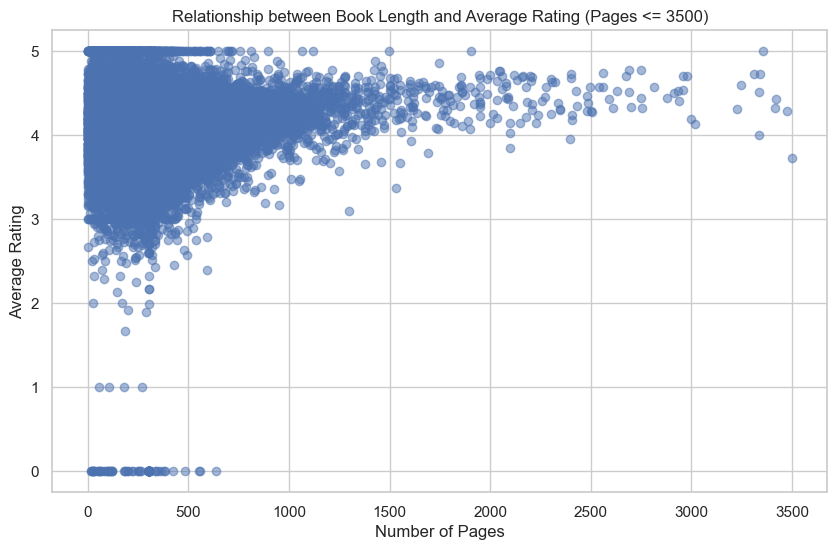

In [166]:
import matplotlib.pyplot as plt

# Set the range for 'pages' variable
lower_limit = 0
upper_limit = 3500

# Filter the data to include only points within the specified range
filtered_df = df[(df['pages'] >= lower_limit) & (df['pages'] <= upper_limit)]

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['pages'], filtered_df['rating'], alpha=0.5)
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.title('Relationship between Book Length and Average Rating (Pages <= 3500)')
plt.show()



In [167]:
import plotly.express as px

# Apply a logarithmic scale to the 'numRatings' variable with a small constant
small_const = 1e-10  # Small constant to avoid taking log(0)
df['logNumRatings'] = np.log10(df['numRatings'] + small_const)

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='price', y='logNumRatings', title='Scatter Plot: Price vs. Log(Number of Ratings)')

fig.update_xaxes(title='Price')
fig.update_yaxes(title='Log(Number of Ratings)')

fig.show()



In [ ]:
# Calculate the correlation coefficient between 'numRatings' and 'price'
correlation = df['numRatings'].corr(df['price'])
print(f'Correlation between Number of Ratings and Price: {correlation:.2f}')

In [168]:
import numpy as np
import pandas as pd

# Apply a logarithmic scale to the 'price' and 'numRatings' variables
small_const = 1e-10  # Small constant to avoid taking log(0)
df['logPrice'] = np.log10(df['price'] + small_const)
df['logNumRatings'] = np.log10(df['numRatings'] + small_const)

# Calculate the correlation coefficient
correlation = df['logPrice'].corr(df['logNumRatings'])

# Print the correlation coefficient
print(f'Correlation between Log(Price) and Log(Number of Ratings): {correlation:.2f}')


Correlation between Log(Price) and Log(Number of Ratings): -0.18


In [169]:
# List of selected numeric columns for correlation analysis
selected_columns = [
    'rating',
    'pages',
    'bbeScore',
    'bbeVotes',
    'price',
    'numRatings',
    'rating'
]

# Calculate the correlation coefficients
correlations = df[selected_columns].corrwith(df['numRatings'])

# Print the correlations
print(correlations)


rating      0.014880
pages       0.035901
bbeScore    0.709226
bbeVotes    0.719139
price      -0.020979
rating      0.014880
dtype: float64


In [170]:
import plotly.express as px
import plotly.figure_factory as ff

# Include 'numRatings' in the selected columns
selected_columns = [
    'rating',
    'pages',
    'bbeScore',
    'bbeVotes',
    'price',
    'numRatings',
    'rating'
]

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap for the correlation matrix
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=selected_columns,
    y=selected_columns,
    colorscale='Viridis',  
    annotation_text=correlation_matrix.round(2).values,
    showscale=True
)

fig.update_layout(
    title='Correlation Heatmap (Including numRatings)',
    xaxis=dict(side='top')
)

fig.show()





A strong positive correlation between 'bbeScore', 'bbeVotes', and 'numRatings' suggests that there is a significant relationship between these variables. Let's break down what this strong correlation might mean:

1. 'bbeScore': The 'bbeScore' is likely a score or rating associated with a book. The strong positive correlation with 'numRatings' indicates that books with higher 'bbeScore' tend to have more ratings. In other words, highly-rated books (according to 'bbeScore') are more likely to attract a larger number of readers and receive more ratings.

2. 'bbeVotes': 'bbeVotes' could represent the number of votes or reviews a book has received. The strong positive correlation with 'numRatings' suggests that books with more votes or reviews tend to have a higher number of ratings. It implies that books with more reader engagement, as indicated by votes or reviews, are also likely to have more ratings.

3. 'numRatings': This is the number of ratings a book has received. The strong correlation with both 'bbeScore' and 'bbeVotes' reinforces the idea that highly-rated books with more reader engagement tend to accumulate a larger number of ratings.

In summary, the strong positive correlation between 'bbeScore', 'bbeVotes', and 'numRatings' indicates that highly-rated books with more reader engagement, as measured by both score and votes, tend to have a larger number of ratings. This relationship suggests that readers are more likely to rate and engage with books that are highly rated and have more votes, contributing to a higher number of ratings for those books.

In [172]:
series_counts = df['series'].value_counts()
top_10_series = series_counts.head(10)
print(top_10_series)



series
Star Wars Legends                            15
Selected Poems_v1                            13
Sherlock Holmes                              13
Dear America                                 12
The Society On Da Run                        11
Duluoz Legend                                10
If You Give...                               10
Avatar: The Last Airbender Books              9
The World of Beatrix Potter: Peter Rabbit     8
Намедни. Наша эра                             8
Name: count, dtype: int64


In [173]:
import pandas as pd
import plotly.express as px

# Create a Series count of the top 5 series
top_series = df['series'].value_counts().head(5)

# Create a bar chart
fig = px.bar(top_series, x=top_series.index, y=top_series, labels={'index': 'Series', 'count': 'Number of Books'})
fig.update_layout(title='Top 5 Series with Most Books')
fig.show()


In [176]:
import numpy as np

# Filter out rows where rating or numRatings are zero or negative
filtered_df = df[(df['rating'] > 0) & (df['numRatings'] > 0)]

# Calculate the correlation between log-transformed rating and log-transformed numRatings
correlation = np.log(filtered_df['rating']).corr(np.log(filtered_df['numRatings']))
print(f"Correlation between log-transformed rating and log-transformed numRatings: {correlation}")




Correlation between log-transformed rating and log-transformed numRatings: -0.12533336252908978


The correlation between the log-transformed ratings and log-transformed numRatings is approximately -0.1254. This negative correlation suggests that as the number of ratings (numRatings) increases, the log-transformed rating tends to decrease slightly. In other words, books with more ratings tend to have slightly lower log-transformed ratings. Please note that this correlation is relatively weak.


In [177]:
# Calculate the average rating for each publisher
avg_rating_by_publisher = df.groupby('publisher')['rating'].mean()

# Sort the publishers by average rating in descending order and get the top 10
top_10_highest_rated_publishers = avg_rating_by_publisher.sort_values(ascending=False).head(10)

# Display the top 10 highest-rated publishers
print(top_10_highest_rated_publishers)


publisher
Holly Willow                 5.0
Weltbil                      5.0
Fondo Editorial Fundarte     5.0
Toplink Publishing, LLC      5.0
Little Fish Publishing       5.0
Balboa Press Au              5.0
Brill Academic Publishers    5.0
New American Storybook       5.0
http://www.lulu.com          5.0
Sharon Wheater               5.0
Name: rating, dtype: float64


Holly Willow  is one of the top publisher with 5 rating but numRatings is very less, but since publishers with a high average rating and a substantial number of ratings (in thousands or millions) are generally considered more reliable for assessing the quality of their books you considered numRatings too and found out International Music Publications has 4.64 average rating with numRatings nearly 70 thousand.

In [178]:
import pandas as pd

# Find the 95th percentile of numRatings
threshold = df['numRatings'].quantile(0.95)

# Find publishers with high numRatings (e.g., above the 95th percentile)
filtered_publishers = df[df['numRatings'] > threshold]

# Calculate the average rating for each publisher
avg_rating_by_publisher = filtered_publishers.groupby('publisher')['rating'].mean()

# Select the top 10 publishers with the highest average rating
top_10_publishers = avg_rating_by_publisher.nlargest(10)

# Display the top 10 publishers
print(top_10_publishers)


publisher
International Music Publications            4.640
Tom Doherty                                 4.630
BBC Audiobooks                              4.620
Zondervan Publishing                        4.590
Orion Children's Books                      4.580
Penguin Group DAW                           4.530
Arthur A. Levine Books / Scholastic Inc.    4.525
Multnomah                                   4.490
HarperVoyager                               4.485
Amy Einhorn Books/G.P. Putnam's Sons        4.470
Name: rating, dtype: float64


In [179]:
import pandas as pd
import plotly.express as px

# Find the 95th percentile of numRatings
threshold = df['numRatings'].quantile(0.95)

# Find publishers with high numRatings (e.g., above the 95th percentile)
filtered_publishers = df[df['numRatings'] > threshold]

# Calculate the average rating for each publisher
avg_rating_by_publisher = filtered_publishers.groupby('publisher')['rating'].mean()

# Select the top 10 publishers with the highest average rating
top_10_publishers = avg_rating_by_publisher.nlargest(10)

# Create a bar chart for the top 10 publishers with high ratings
fig = px.bar(top_10_publishers, x=top_10_publishers.index,
             y=top_10_publishers, labels={'index': 'Publisher', 'rating': 'Average Rating'})
fig.update_layout(title='Top 10 Publishers with High Average Ratings (95th percentile of numRatings)')
fig.show()

